## **K-Means Clustering**

* Perform the following on the "diver dataset":
    * Make a k-means clustering model by taking the number of centroid as 2
    * Evaluate the coordinates of the centroids
    * Plot the centroids along with their clustered groups

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv("driver-data.csv")

In [17]:
#Check first five rows
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [18]:
#Check number of columns and rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


#### **Finding and Treating Null Values**

In [19]:
#Finding count of null values
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

#### **Check Data Types**

In [20]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

To check the type of data, you can use dtypes method.

#### **Visualize the Data points** 

Text(0, 0.5, 'mean_over_speed_perc')

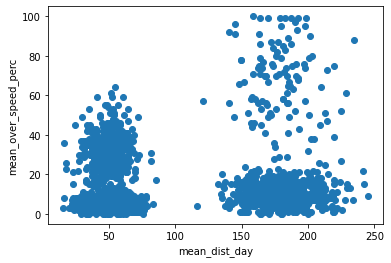

In [21]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [24]:
np.unique(y_predicted)

array([0, 1], dtype=int32)

#### **Add the Predicted Clusters Column to the Dataset**

In [25]:
df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
2664,3423310952,44.41,3,0
1784,3423313607,63.01,7,0
258,3423311301,43.48,29,0
2732,3423313955,57.16,4,0
1888,3423313365,30.30,1,0


#### **Get the Coordinates of Cluster Centers**

In [26]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

#### **Plot the Clusters with their Centroids**

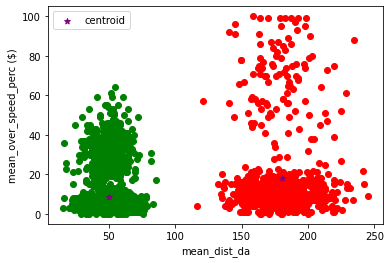

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [28]:
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1
